In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
old_data = pd.read_csv('prior_data.csv')
new_data = pd.read_csv('eps_updated_tgts_no_bp_rp_run.csv')

In [3]:

old_data = old_data.rename(columns={'KIC': 'ID'})
old_data.head()

,ID,Teff,Teff_err,dnu,dnu_err,numax,numax_err,bp_rp,eps,eps_err,eps_mod
0,1162746,4989.0,100.0,3.703,0.111,27.38,0.77,1.255957,0.793286,0.029117,0.793286
1,1432587,4443.0,100.0,1.070,0.013,5.38,0.30,1.537200,0.530220,0.039405,0.530220
2,1433593,4956.0,100.0,6.241,0.013,69.14,0.59,1.327025,1.081346,0.009676,1.081346
3,1433730,4767.0,100.0,4.085,0.019,40.37,0.54,1.424954,1.018962,0.013224,1.018962
4,1435573,4821.0,100.0,3.641,0.083,25.71,0.64,1.350528,0.608582,0.025290,0.608582


In [4]:

new_data = new_data.rename(columns={'eps_error': 'eps_err', 'teff': 'Teff', 'teff_error': 'Teff_err', 
                                   'dnu_error': 'dnu_err', 'numax_error': 'numax_err'})
new_data.head()

,ID,Teff,Teff_err,dnu,dnu_err,numax,numax_err,bp_rp,eps,eps_err,eps_mod
0,1162746,4989.0,100.0,3.872016,0.066600,25.709531,0.978267,1.255957,0.802968,0.103172,NaN
1,1432587,4443.0,100.0,1.121764,0.020293,6.366897,0.382078,1.537200,0.512575,0.131166,NaN
2,1433593,4956.0,100.0,6.248322,0.015601,70.780616,0.978140,1.327025,1.073235,0.028024,NaN
3,1433730,4767.0,100.0,4.059420,0.015561,41.681421,0.800485,1.424954,1.003464,0.040405,NaN
4,1435573,4821.0,100.0,3.761687,0.045042,28.201150,0.539882,1.350528,0.579569,0.079744,NaN


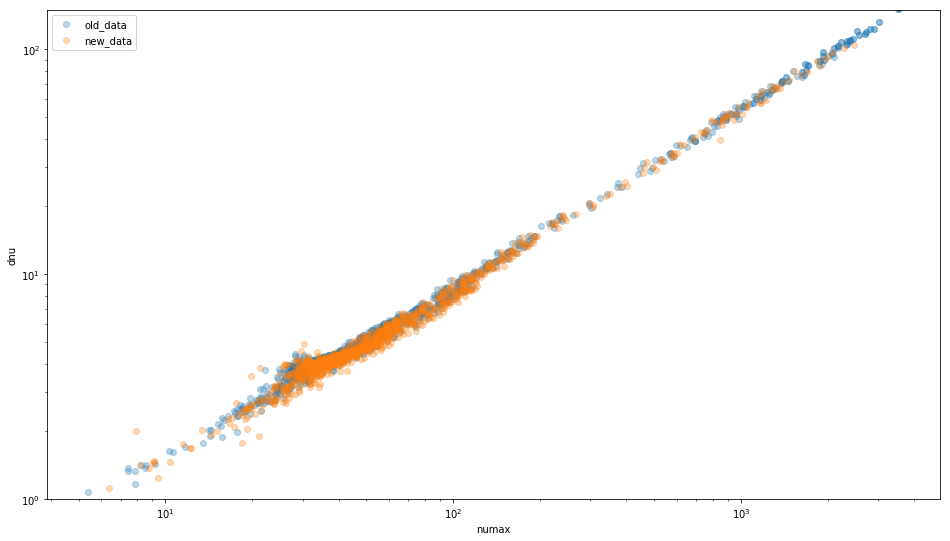

In [5]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(old_data.numax, old_data.dnu, label='old_data', alpha=0.3)
ax.scatter(new_data.numax, new_data.dnu, label='new_data', alpha=0.3)
ax.set_xlabel('numax')
ax.set_ylabel('dnu')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1,150])
ax.legend()

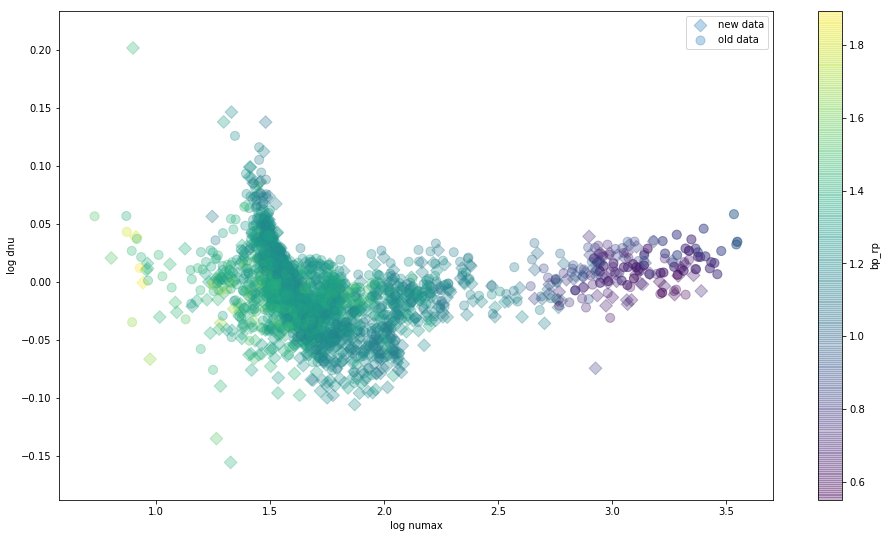

In [6]:
fig, ax = plt.subplots(figsize=[16,9])
log_numax = np.log10(old_data.numax).values
log_dnu = np.log10(old_data.dnu).values
z = np.polyfit(log_numax, log_dnu, deg=1)
p = np.poly1d(z)
ax.scatter(np.log10(new_data.numax), np.log10(new_data.dnu) - p(np.log10(new_data.numax)), 
           c=new_data.bp_rp, marker='D', s=82, alpha=0.3, label='new data')
CS = ax.scatter(log_numax, log_dnu - p(log_numax), c=old_data.bp_rp, s=82, 
                alpha=0.3, label='old data')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('bp_rp')
ax.set_xlabel('log numax')
ax.set_ylabel('log dnu')
ax.legend()

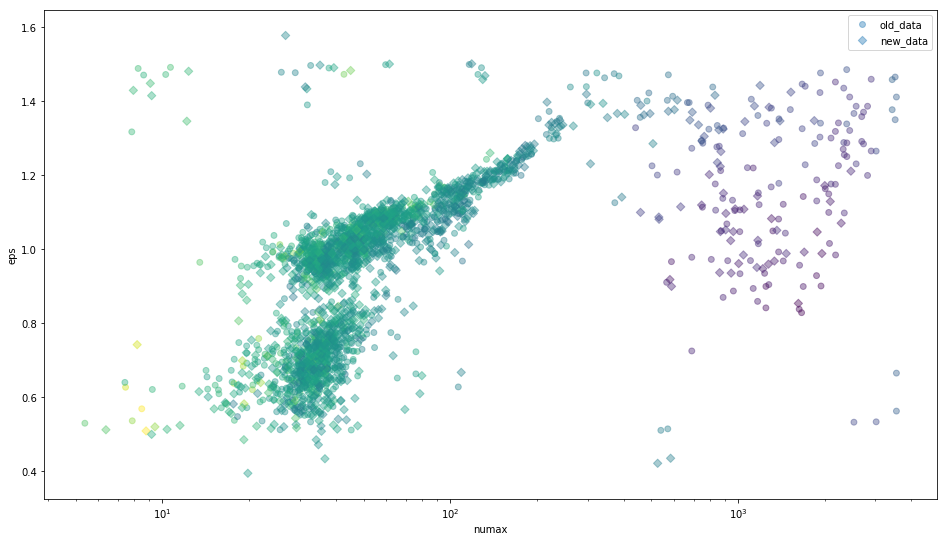

In [7]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(old_data.numax, old_data.eps, c=old_data.bp_rp,
          s=35, label='old_data', alpha=0.4)
ax.scatter(new_data.numax, new_data.eps, c=new_data.bp_rp, 
          marker='D', s=35, label='new_data', alpha=0.4)
ax.legend()
ax.set_xlabel('numax')
ax.set_ylabel('eps')
ax.set_xscale('log')

In [10]:
df = pd.concat([old_data, new_data], sort=False)
df.to_csv('prior_data2.csv', index=False)

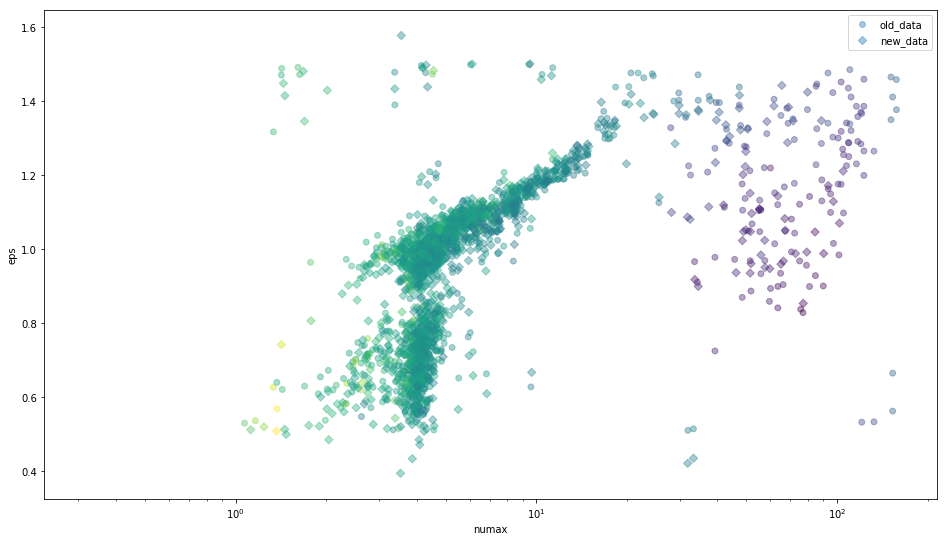

In [11]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(old_data.dnu, old_data.eps, c=old_data.bp_rp,
          s=35, label='old_data', alpha=0.4)
ax.scatter(new_data.dnu, new_data.eps, c=new_data.bp_rp, 
          marker='D', s=35, label='new_data', alpha=0.4)
ax.legend()
ax.set_xlabel('numax')
ax.set_ylabel('eps')
ax.set_xscale('log')